# Run (Track Type) Identification

To provide track type specific results, identifying the points where the track changes in Tile - without the help from a ground truth - is a crucial step. A good example is only providing turn and jump data while inside a downhill track type.

## Targetted Analytics

Since we only care about turning statistics during the run, we'll need to implement a service to identify runs. We already have liftpeak identification from the static registration service, so it's trivial to expose that property as it's own object (inside Tile obj). Don't use the static registration timestamps themselves since you aren't guarunteed to get a motionless capture (and therefore a ts) at a liftpeak. 

Liftpeaks and run bottoms could be typed by the same parent type, stored as lists inside Tile:

```python
class GeographicalPoint:
    ts: float
    alt: float | None

class Tile:
    lift_peaks: list[GeographicalPoint]
    run_bottoms: list[GeographicalPoint]
```

Could report avg turn cadence! Group together in clusters of turns, avoid including long outliers to account for flat & pitch variations.


Using `Geography`, implement concurrent tests that identify individual points of lift peaks, run peaks, & run bottoms:

In [1]:
from domain.sessions import Session_2023_12_30
from utilities.plotting import plotRunGeographyAnalysis

session_2023_12_30 = Session_2023_12_30()

## Assumptions

- lift-first based resort
- current point based on the last point, will be as good as the failure of all


lift_idxs: [[ 47740  91983]
 [114763 153949]]
downhill_idxs: [[ 95273 104443]
 [170319 178359]]
peak_idxs: [[ 91983  95273]
 [153949 170319]]
jumps.min_idx: [98716, 98955, 99503, 100473, 102659, 171847, 172036, 174423, 174627]


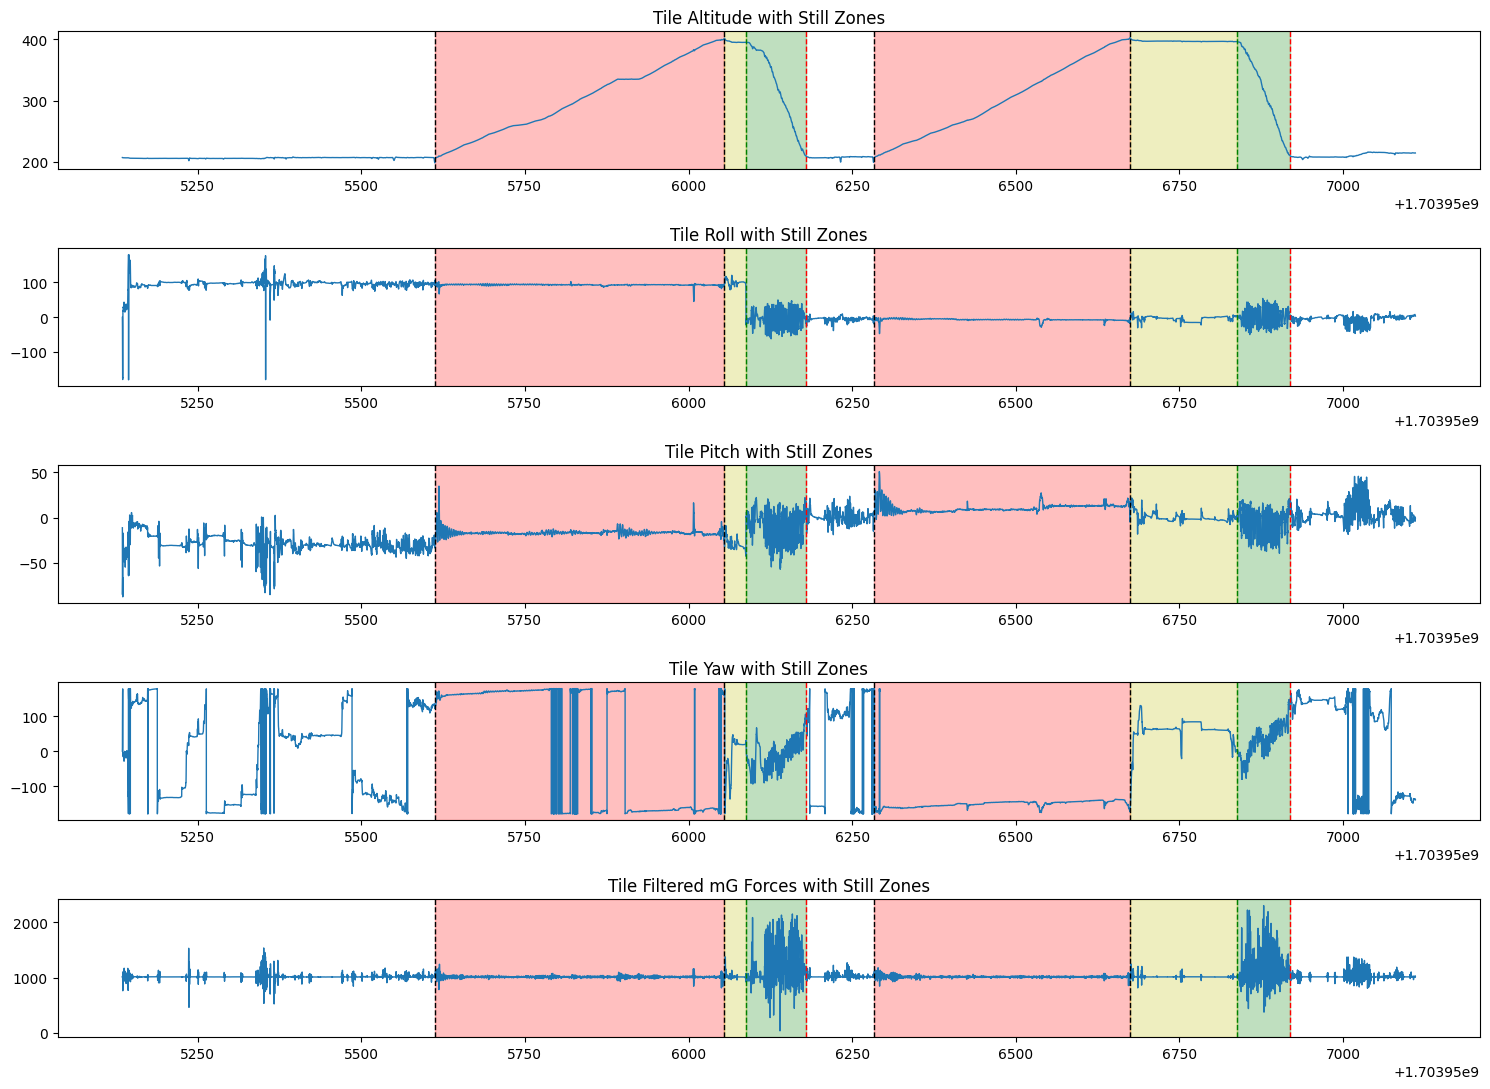

In [2]:
print('lift_idxs:', session_2023_12_30.tile.lift_idxs)
print('downhill_idxs:', session_2023_12_30.tile.downhill_idxs)
print('peak_idxs:', session_2023_12_30.tile.peak_idxs)

print('jumps.min_idx:', [jump.min_idx for jump in session_2023_12_30.tile.jumps])

_ = plotRunGeographyAnalysis(session_2023_12_30.tile)

## Correcting for Errors in Identification

Sessions are prone to random events, so correct any fragmented tracks and stitch them together. This corrects for the cases where you may stop mid-run, or if the lift stops for a long period of time.

This is done inside `patchFragmentedTracks()`